## Métodos de Runge-Kutta de 2ª Ordem + Euler

Este notebook implementa quatro métodos para resolução numérica de EDOs:
- Euler (RK1)
- Heun (RK2 com \u03b1 = 1/2)
- Ponto Médio (RK2 com \u03b1 = 1)
- Ralston (RK2 com \u03b1 = 2/3)

Formato geral de Runge-Kutta de 2ª ordem:

k1 = h * f(x_n, y_n)
k2 = h * f(x_n + h/(2\u03b1), y_n + k1/(2\u03b1))
y_{n+1} = y_n + (1 - 1/(2\u03b1)) * k1 + 1/(2\u03b1) * k2

Todos têm erro global O(h^2), exceto Euler que tem O(h).

In [1]:
import matplotlib.pyplot as plt

In [41]:
def runge_kutta_2_ordem(f, x0, y0, h, n, metodo="heun"):
    print(f"\nMétodo de {metodo.capitalize()}\n")
    print(f"{'ITER.':<6}{'x0':<10}{'y0':<15}{'K1':<15}{'K2':<15}{'|yn - yn-1|':<15}")
    print("-" * 76)

    x_vals = [x0]
    y_vals = [y0]

    for i in range(n):
        x_atual = x_vals[-1]
        y_atual = y_vals[-1]

        if metodo.lower() == "heun":
            k1 = f(x_atual, y_atual)
            k2 = f(x_atual + h, y_atual + h * k1)
            y_next = y_atual + (h / 2) * (k1 + k2)
        elif metodo.lower() == "ponto medio":
            k1 = f(x_atual, y_atual)
            k2 = f(x_atual + h / 2, y_atual + h * k1 / 2)
            y_next = y_atual + h * k2
        elif metodo.lower() == "ralston":
            k1 = f(x_atual, y_atual)
            k2 = f(x_atual + (3/4)*h, y_atual + (3/4)*h*k1)
            y_next = y_atual + h * (k1 + 2 * k2) / 3
        else:
            raise ValueError("Método inválido")

        # erro comparando y_atual com y anterior
        if i == 0:
            erro = '-'
        else:
            y_anterior = y_vals[-2]
            erro = abs(y_atual - y_anterior)

        print(f"{i:<6}{x_atual:<10.5f}{y_atual:<15.5f}{k1:<15.5f}{k2:<15.5f}{erro if erro == '-' else f'{erro:<15.5f}'}")

        x_vals.append(x_atual + h)
        y_vals.append(y_next)

    # Plot
    plt.figure(figsize=(12, 5))

    plt.plot(x_vals, y_vals, marker='o', label='y(x)')
    erros_numericos = [0] + [abs(y_vals[i] - y_vals[i-1]) for i in range(2, len(y_vals))]
    erros_numericos = [0] + erros_numericos  # alinhamento com x_vals
    plt.plot(x_vals, erros_numericos, marker='x', linestyle='--', label='Erro |yᵢ - yᵢ₋₁|')
    plt.title(f'Solução e Erro - Método {metodo.capitalize()}')
    plt.xlabel('x')
    plt.ylabel('y / erro')
    plt.legend()
    plt.grid(True)
    plt.show()


Método de Heun

ITER. x0        y0             K1             K2             |yn - yn-1|    
----------------------------------------------------------------------------
0     1.00000   2.00000        4.00000        5.28000        -
1     1.10000   2.46400        5.42080        7.21459        0.46400        
2     1.20000   3.09577        7.42985        9.98076        0.63177        
3     1.30000   3.96630        10.31238       13.99311       0.87053        
4     1.40000   5.18157        14.50841       19.89725       1.21527        
5     1.50000   6.90186        20.70557       28.71173       1.72028        
6     1.60000   9.37272        29.99271       42.06478       2.47086        
7     1.70000   12.97560       44.11703       62.59428       3.60287        
8     1.80000   18.31116       65.92018       94.63208       5.33557        
9     1.90000   26.33877       100.08734      145.39003      8.02761        


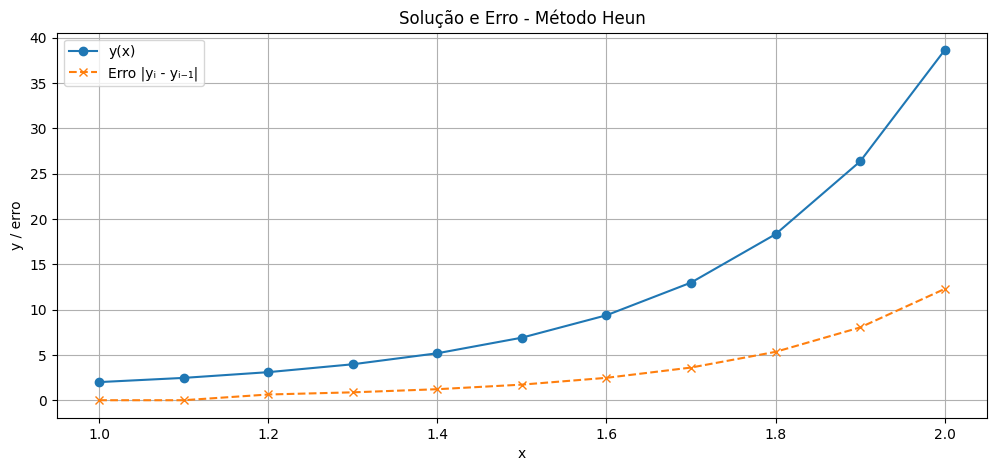

In [42]:
# Definição da função diferencial
f = lambda x, y: 2*x*y

# Condições iniciais
x0 = 1
y0 = 2
h = 0.1
n = 10

runge_kutta_2_ordem(f, x0, y0, h, n, metodo="heun")



Método de Ponto medio

ITER. x0        y0             K1             K2             |yn - yn-1|    
----------------------------------------------------------------------------
0     1.00000   2.00000        4.00000        4.62000        -
1     1.10000   2.46200        5.41640        6.28549        0.46200        
2     1.20000   3.09055        7.41732        8.65354        0.62855        
3     1.30000   3.95590        10.28535       12.06946       0.86535        
4     1.40000   5.16285        14.45597       17.06838       1.20695        
5     1.50000   6.86969        20.60906       24.49043       1.70684        
6     1.60000   9.31873        29.81993       35.67209       2.44904        
7     1.70000   12.88594       43.81219       52.76791       3.56721        
8     1.80000   18.16273       65.38582       79.29848       5.27679        
9     1.90000   26.09258       99.15179       121.09565      7.92985        


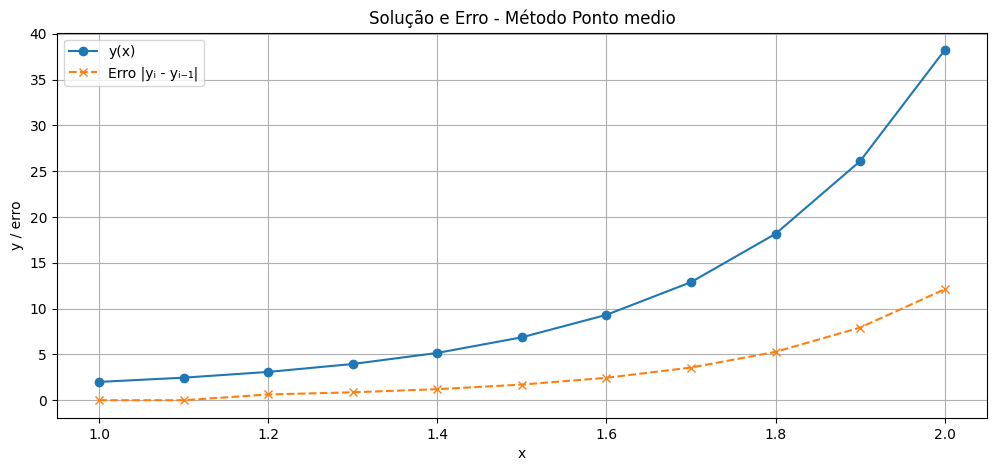

In [43]:
runge_kutta_2_ordem(f, x0, y0, h, n, metodo="ponto medio")


Método de Ralston

ITER. x0        y0             K1             K2             |yn - yn-1|    
----------------------------------------------------------------------------
0     1.00000   2.00000        4.00000        4.94500        -
1     1.10000   2.46300        5.41860        6.74308        0.46300        
2     1.20000   3.09316        7.42358        9.30731        0.63016        
3     1.30000   3.96110        10.29886       13.01716       0.86794        
4     1.40000   5.17220        14.48217       18.46219       1.21111        
5     1.50000   6.88576        20.65727       26.57041       1.71355        
6     1.60000   9.34569        29.90622       38.82201       2.45994        
7     1.70000   12.93070       43.96438       57.60950       3.58501        
8     1.80000   18.23681       65.65253       86.85282       5.30611        
9     1.90000   26.21542       99.61859       133.06291      7.97861        


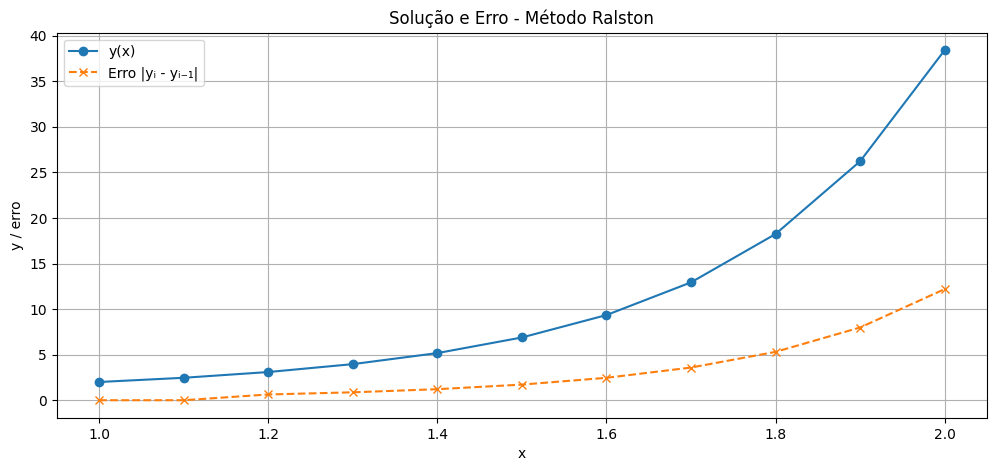

In [44]:
runge_kutta_2_ordem(f, x0, y0, h, n, metodo="ralston")